In [1]:
import pandas as pd
import numpy as np
import semopy as sem
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy import stats as st
from bioinfokit.analys import stat
import pingouin as pg 
import plot_likert as pl

In [2]:
float_formatter = "{:.2f}".format
pd.options.display.float_format = float_formatter
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
data=pd.read_csv("experiencia_sppc.csv",sep=";")

In [4]:
version=data["version"].astype("category")
release=data["release"].astype("category")

In [5]:
df=data.drop(['Timestamp','rut','coop1','coop2','coop3',"choice1"],axis=1,inplace=False)

In [6]:
df=df.query("version == 'Single Player Pensamiento Computacional'")

In [7]:
pg.cronbach_alpha(data=df[["feedback1","feedback2","feedback3","feedback4"]])

(0.8623889437314907, array([0.74, 0.94]))

In [8]:
pg.cronbach_alpha(data=df[["goals1","goals2","goals3"]])

(0.8984442523768369, array([0.80, 0.95]))

In [9]:
pg.cronbach_alpha(data=df[["challenge1","challenge2","challenge3","challenge4"]])

(0.9371440736601203, array([0.88, 0.97]))

In [10]:
pg.cronbach_alpha(data=df[["enjoy1","enjoy2","enjoy3"]])

(0.9257506527415142, array([0.85, 0.97]))

In [11]:
pg.cronbach_alpha(data=df[["choice2","choice3"]])

(0.849512069851053, array([0.65, 0.94]))

In [12]:
dfl=df.astype(str)[["goals1","goals2","goals3","feedback1","feedback2","feedback3","feedback4","challenge1","challenge2","challenge3","challenge4","enjoy1","enjoy2","enjoy3","choice2","choice3"]]

<AxesSubplot:xlabel='Number of Responses'>

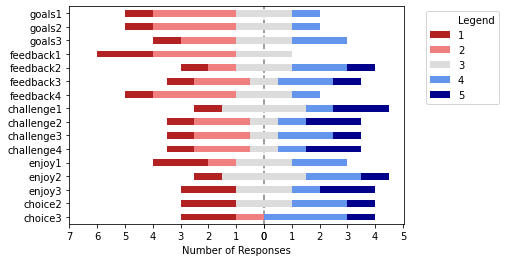

In [13]:
d1=df.astype(str).query("release=='1'")
d1=d1[["goals1","goals2","goals3","feedback1","feedback2","feedback3","feedback4","challenge1","challenge2","challenge3","challenge4","enjoy1","enjoy2","enjoy3","choice2","choice3"]]
pl.plot_likert(d1,pl.scales.raw5)

<AxesSubplot:xlabel='Number of Responses'>

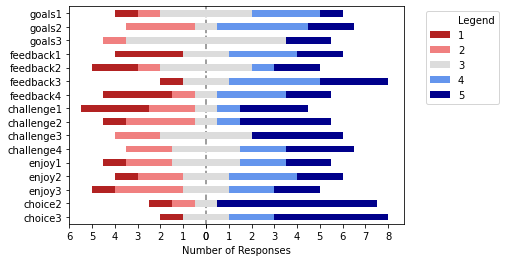

In [14]:
d2=df.astype(str).query("release=='2'")
d2=d2[["goals1","goals2","goals3","feedback1","feedback2","feedback3","feedback4","challenge1","challenge2","challenge3","challenge4","enjoy1","enjoy2","enjoy3","choice2","choice3"]]
pl.plot_likert(d2,pl.scales.raw5)

<AxesSubplot:xlabel='Number of Responses'>

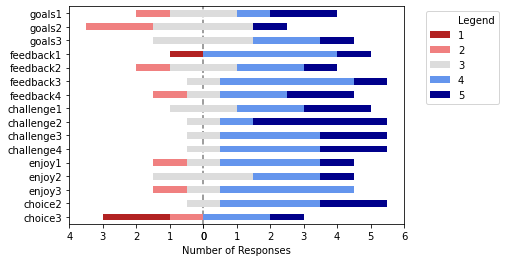

In [15]:
d3=df.astype(str).query("release=='3'")
d3=d3[["goals1","goals2","goals3","feedback1","feedback2","feedback3","feedback4","challenge1","challenge2","challenge3","challenge4","enjoy1","enjoy2","enjoy3","choice2","choice3"]]
pl.plot_likert(d3,pl.scales.raw5)

In [16]:
dfl.dropna(inplace=True)

<AxesSubplot:>

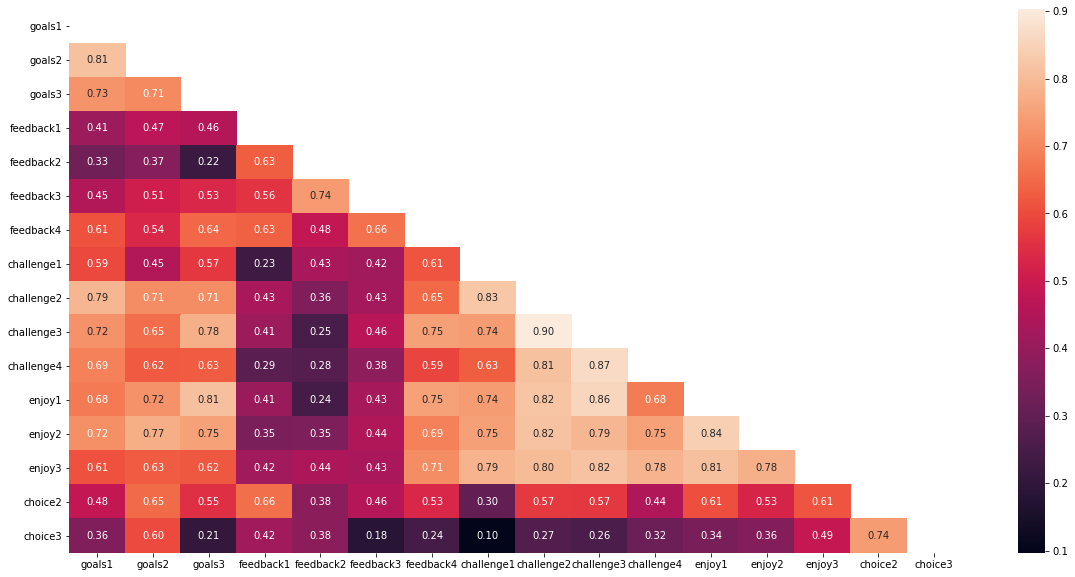

In [19]:
dfl=dfl.astype(float)
c=dfl.corr()
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(c, dtype=np.bool))
sb.heatmap(c,mask=mask, annot=True, fmt=".2f")

In [20]:
teo_spec="""
eta1 =~ goals2 + goals1 + goals3
eta2 =~ challenge1 + challenge2 + challenge3 + challenge4
eta3 =~ feedback1 + feedback2 + feedback4 + feedback3
eta4 =~ enjoy1 + enjoy2 + enjoy3
eta5 =~ choice2 + choice3
"""
efa_model = sem.Model(teo_spec)
efa_model.fit(df)

SolverResult(fun=8.524238103075982, success=True, n_it=86, x=array([1.01, 0.83, 1.16, 0.98, 0.89, 0.82, 1.03, 0.87, 0.90, 1.00, 0.82,
       0.60, 0.36, 0.30, 0.19, 0.00, 0.47, 0.37, 0.74, 0.67, 0.25, 0.27,
       0.81, 0.28, 0.23, 1.05, 0.13, 1.38, 0.83, 0.92, 1.28, 1.27, 0.86,
       1.01, 0.98, 1.00, 1.00, 0.76, 0.88, 1.19, 0.98, 1.91]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [21]:
scores=efa_model.predict(df)

In [22]:
scores=scores[["eta1","eta2","eta3","eta4","eta5"]]

<AxesSubplot:>

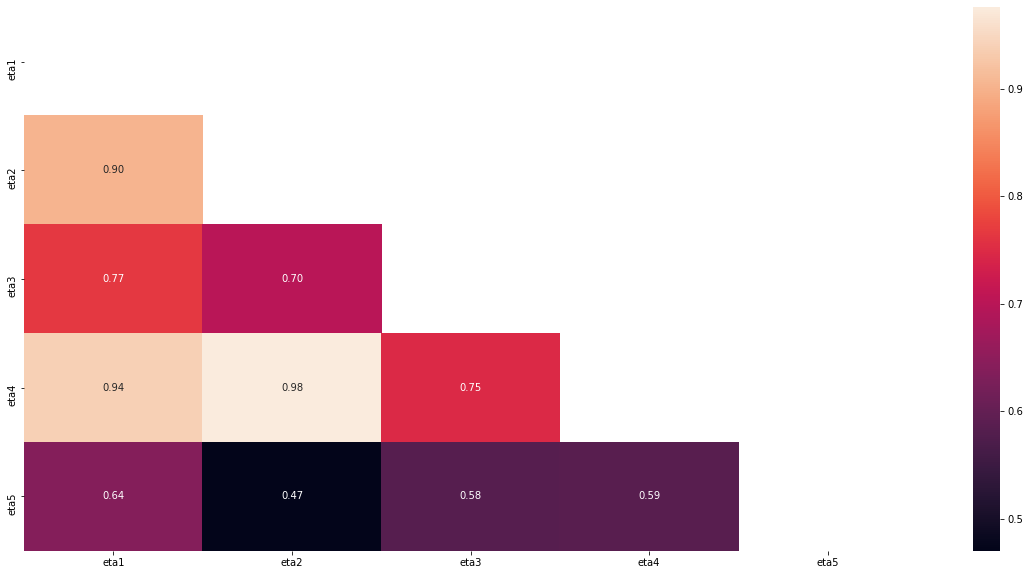

In [23]:
c=scores.corr()
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(c, dtype=np.bool))
sb.heatmap(c,mask=mask, annot=True, fmt=".2f")

In [24]:
scores["release"]=data["release"]

# Anova usando algunos factores

In [46]:
scores=scores.query("release in [2,3]")

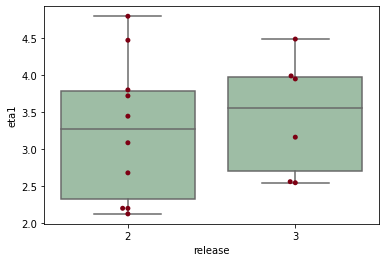

In [47]:
ax = sb.boxplot(x='release', y='eta1', data=scores, color='#99c2a2')
ax = sb.swarmplot(x="release", y="eta1", data=scores, color='#7d0013')
plt.show()

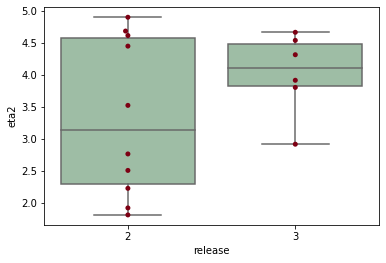

In [48]:
ax = sb.boxplot(x='release', y='eta2', data=scores, color='#99c2a2')
ax = sb.swarmplot(x="release", y="eta2", data=scores, color='#7d0013')
plt.show()

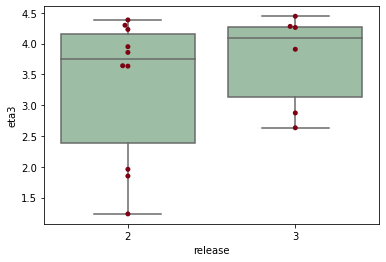

In [49]:
ax = sb.boxplot(x='release', y='eta3', data=scores, color='#99c2a2')
ax = sb.swarmplot(x="release", y="eta3", data=scores, color='#7d0013')
plt.show()

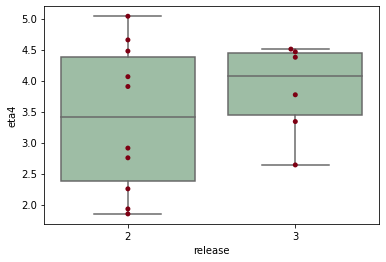

In [50]:
ax = sb.boxplot(x='release', y='eta4', data=scores, color='#99c2a2')
ax = sb.swarmplot(x="release", y="eta4", data=scores, color='#7d0013')
plt.show()

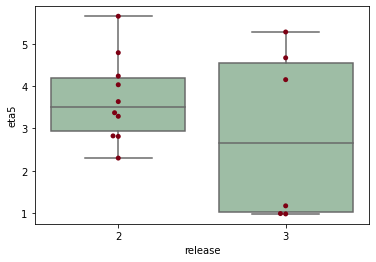

In [51]:
ax = sb.boxplot(x='release', y='eta5', data=scores, color='#99c2a2')
ax = sb.swarmplot(x="release", y="eta5", data=scores, color='#7d0013')
plt.show()

In [52]:
model=ols("eta1 ~ C(release)",data=scores).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

            sum_sq    df    F  PR(>F)
C(release)    0.15  1.00 0.18    0.68
Residual     11.64 14.00  NaN     NaN


In [54]:
model=ols("eta2 ~ C(release)",data=scores).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

            sum_sq    df    F  PR(>F)
C(release)    1.77  1.00 1.56    0.23
Residual     15.83 14.00  NaN     NaN


In [55]:
model=ols("eta3 ~ C(release)",data=scores).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

            sum_sq    df    F  PR(>F)
C(release)    0.69  1.00 0.64    0.44
Residual     15.21 14.00  NaN     NaN


In [56]:
model=ols("eta4 ~ C(release)",data=scores).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

            sum_sq    df    F  PR(>F)
C(release)    0.81  1.00 0.74    0.41
Residual     15.46 14.00  NaN     NaN


In [57]:
model=ols("eta5 ~ C(release)",data=scores).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

            sum_sq    df    F  PR(>F)
C(release)    2.53  1.00 1.18    0.30
Residual     29.92 14.00  NaN     NaN


In [58]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.945665180683136 0.4242658019065857
